# AIPI 590 - XAI | Assignment #06
### Description
Explainable Techniques includes PDP, ICE, and ALE plots. Exploratory analysis the dataset. As well as a comprehensive explanation of the plots.

### Keese Phillips


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/keesephillips/aipi590_xai/blob/main/assignment_6/assignment_6.ipynb)

In [ ]:
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "aipi590_xai"
git_path = 'https://github.com/keesephillips/aipi590_xai'
!git clone "{git_path}"

# Install dependencies from requirements.txt file
!pip install -r "{os.path.join(repo_name,'requirements.txt')}"

notebook_dir = 'assignment_6'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

In [ ]:
# Had an issue installing the package from requirements
!pip install git+https://github.com/MaximeJumelle/ALEPython.git

In [9]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [10]:
diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

In [11]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


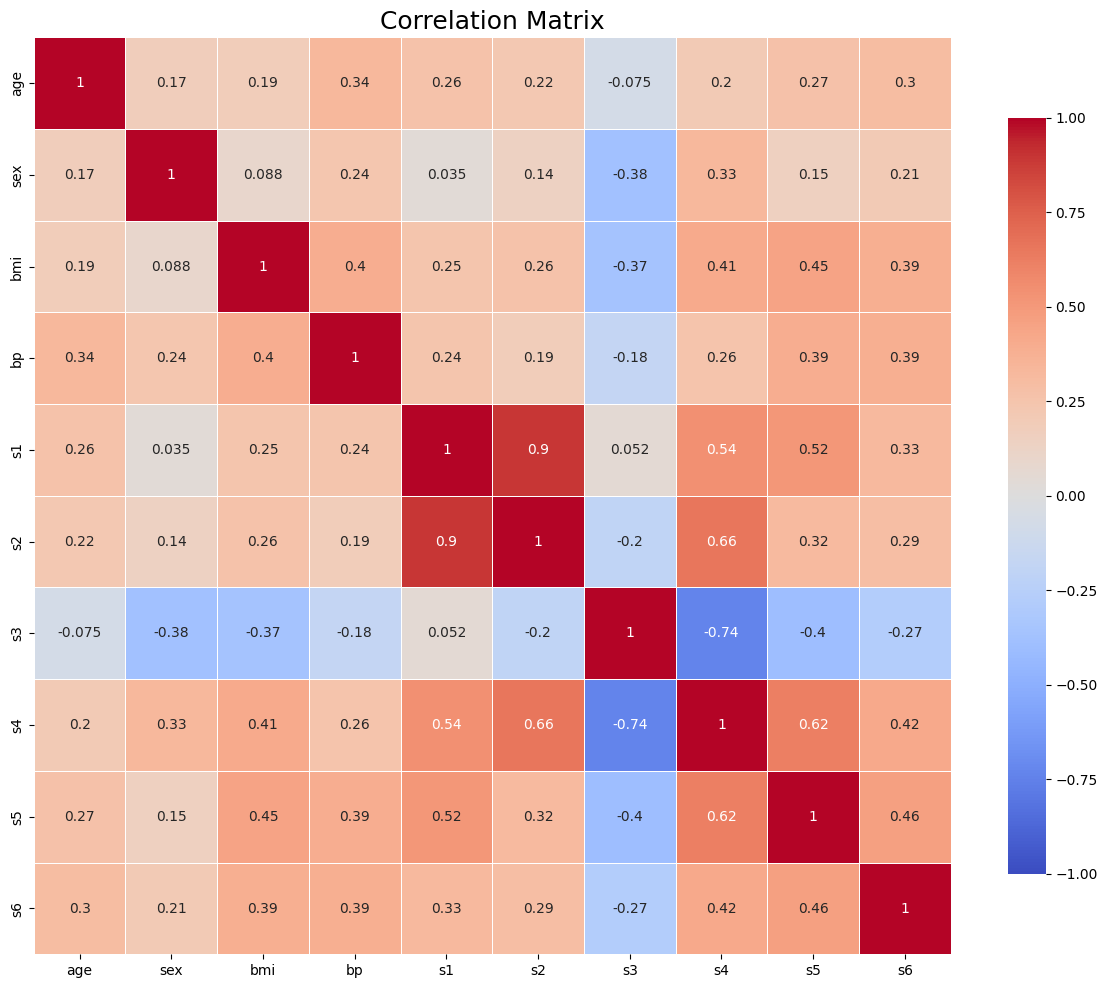

In [14]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=18)

plt.tight_layout()
plt.show()

There does appear to be some slight correlation among several features within the dataset. The correlation between (s1) tc, total serum cholesterol and (s2) ldl, low-density lipoproteins is the highest among features within the dataset. Overall the correlation does not appear too significant to greatly influence the dataset. It could possibly be enough of a correlation among the various features to have an influence on PDPs ability to interpret the features partial dependence.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

The choosen model is a Random Forest Regressor. The model was fit on the diabetes dataset.

PDP vs ALE Plot: age


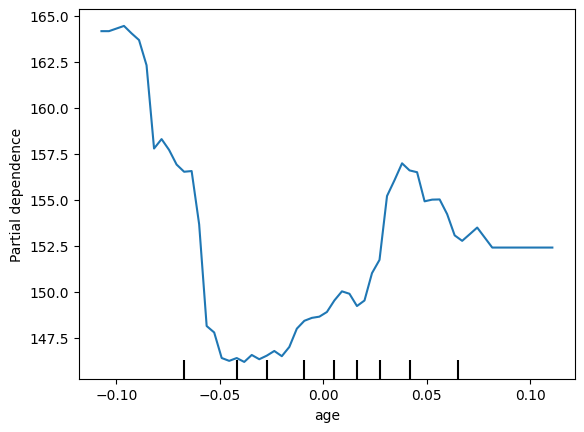

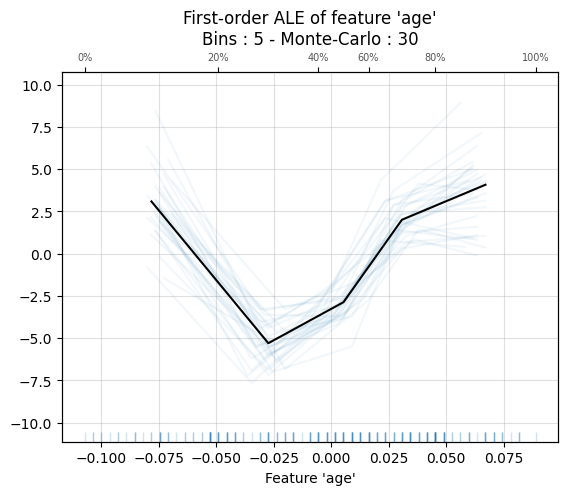

PDP vs ALE Plot: sex


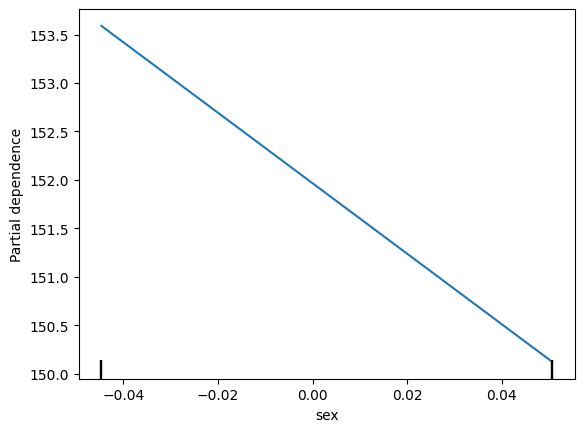

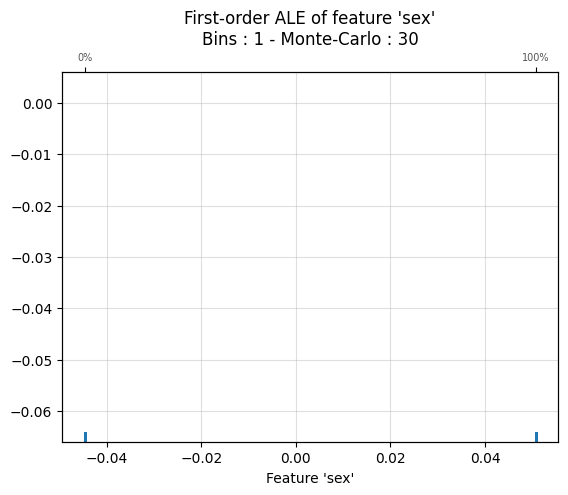

PDP vs ALE Plot: bmi


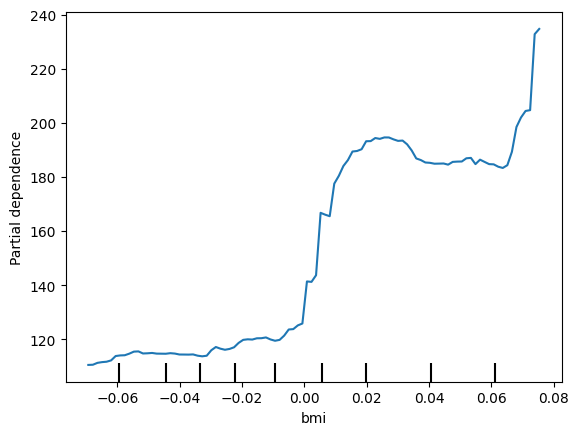

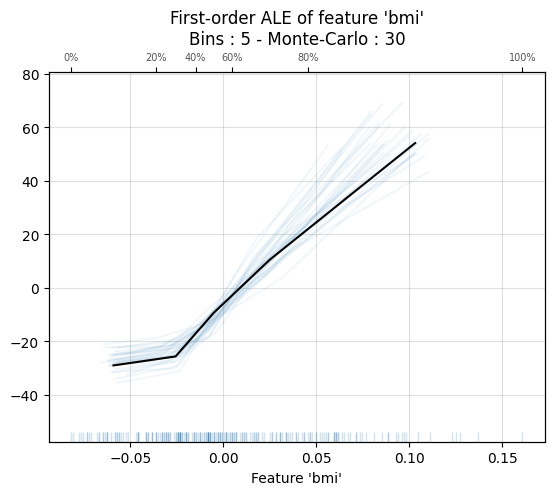

PDP vs ALE Plot: bp


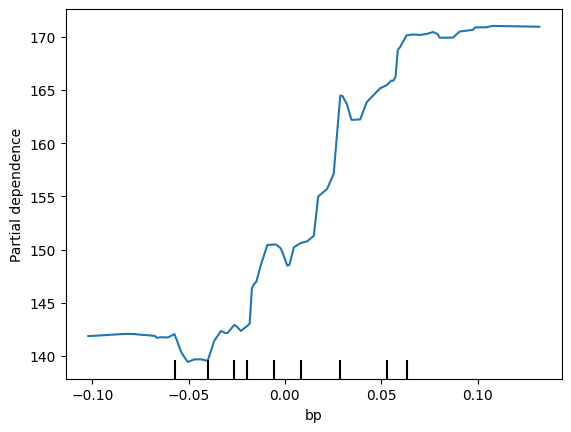

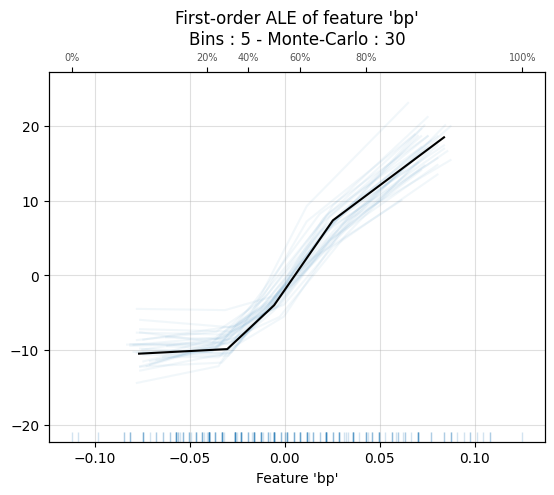

PDP vs ALE Plot: s1


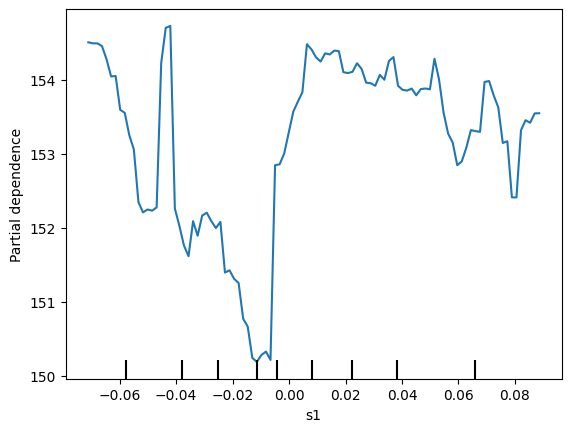

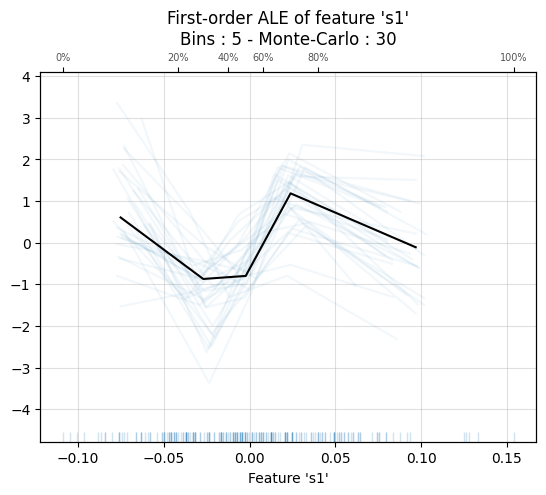

PDP vs ALE Plot: s2


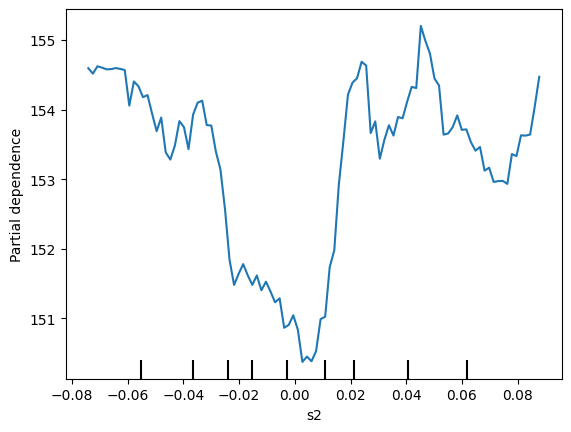

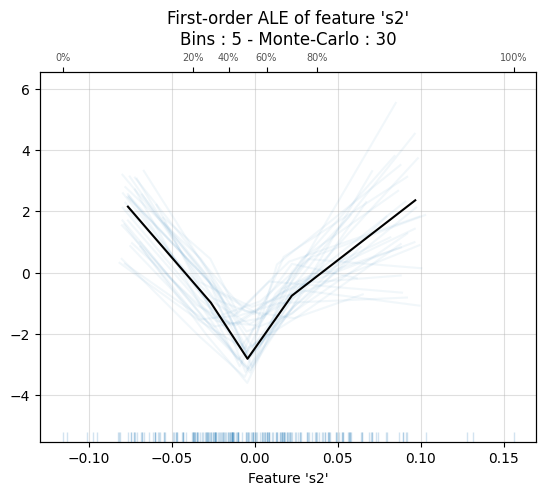

PDP vs ALE Plot: s3


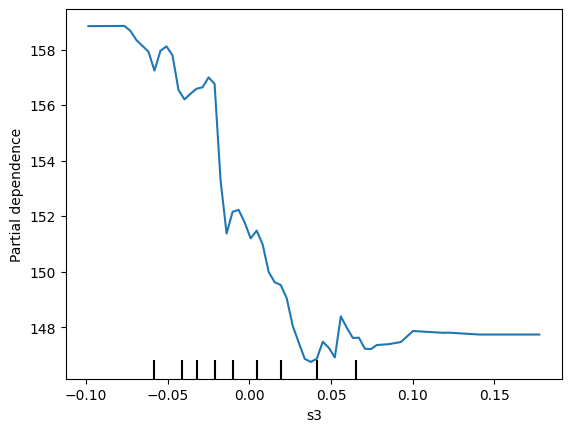

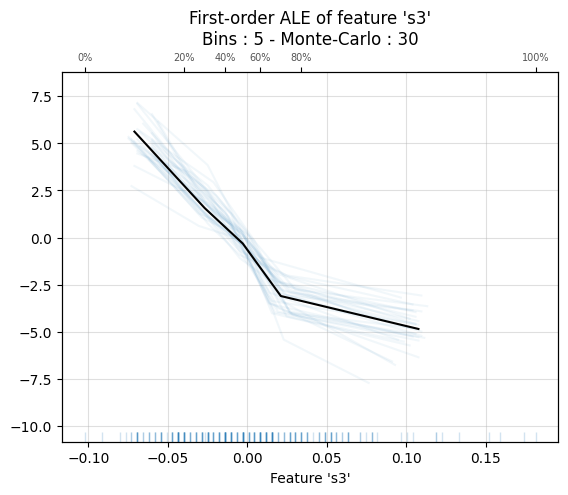

PDP vs ALE Plot: s4


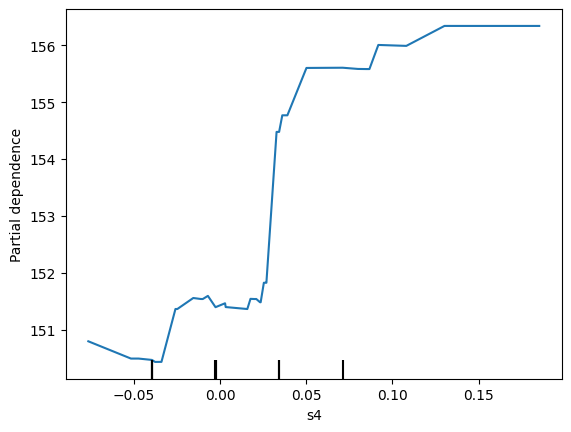

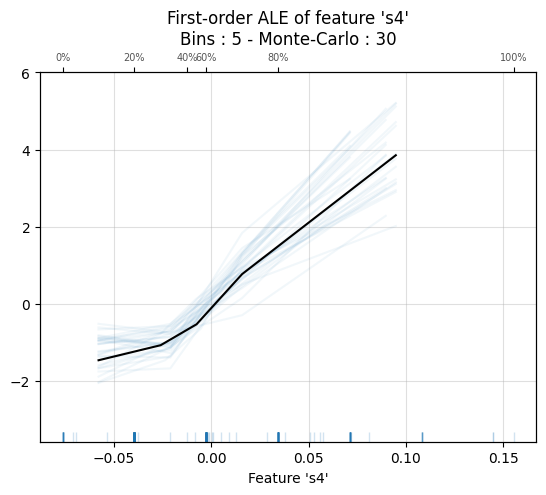

PDP vs ALE Plot: s5


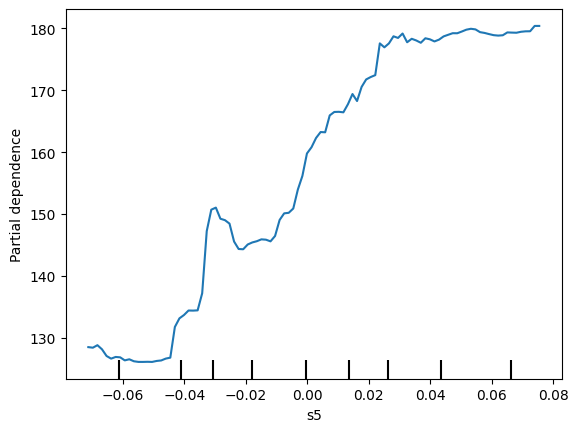

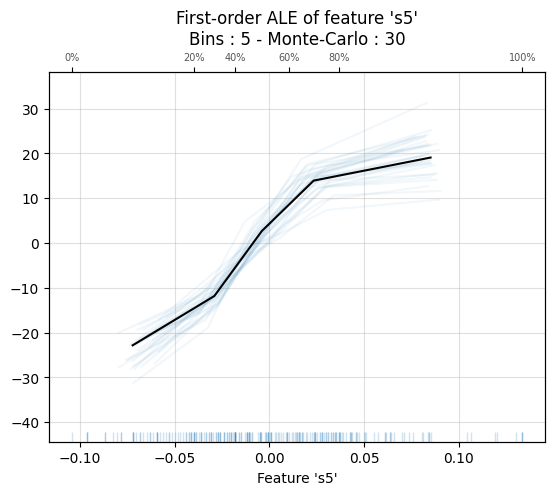

PDP vs ALE Plot: s6


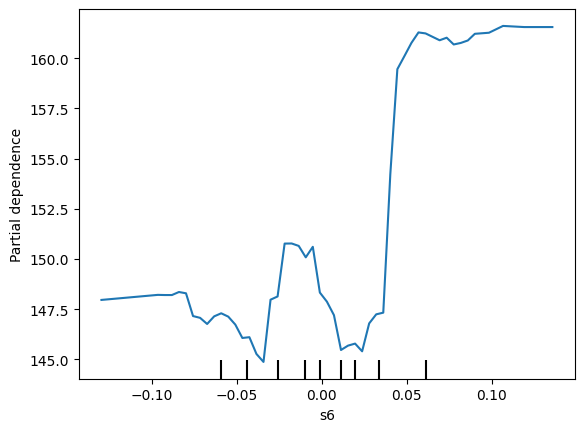

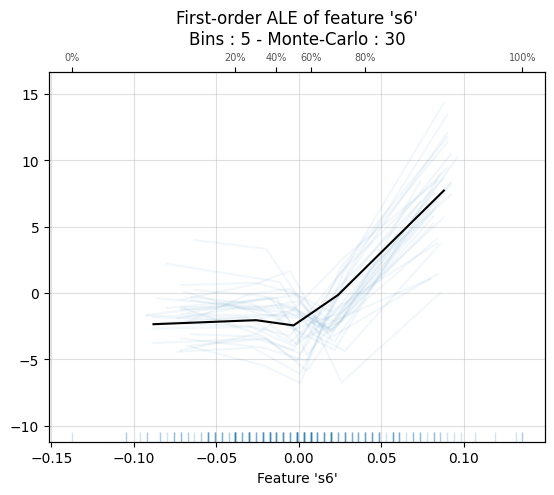

In [16]:
for feature in X.columns:
  print(f"PDP vs ALE Plot: {feature}")
  PartialDependenceDisplay.from_estimator(model, X_test, [feature], kind='average') # PDP Plot
  ale_plot(
    model,
    X_train,
    feature,
    bins=5,
    monte_carlo=True,
    monte_carlo_rep=30,
    monte_carlo_ratio=0.5,
  ) # ALE Plot

The PDP maps the marginal effect of each feature averaged over the entire dataset. ALE maps the local effects by considering the local feature distribution. The correlation among the features as described by the correlation matrix suggests that PDP may slightly struggle on interpretation. The PDP maps seem to be influenced by the behavior of the model outside of the data distribution because one sees several jumps within a few of the features. For example, bmi appears to be roughly linear in the ALE plot but is influenced by the behavior of the model with steep jumps in the PDP plot.

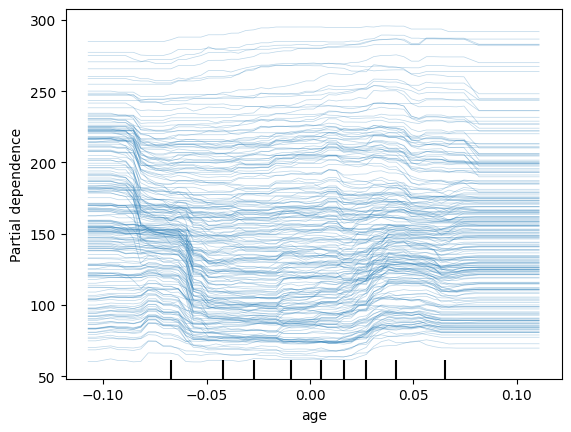

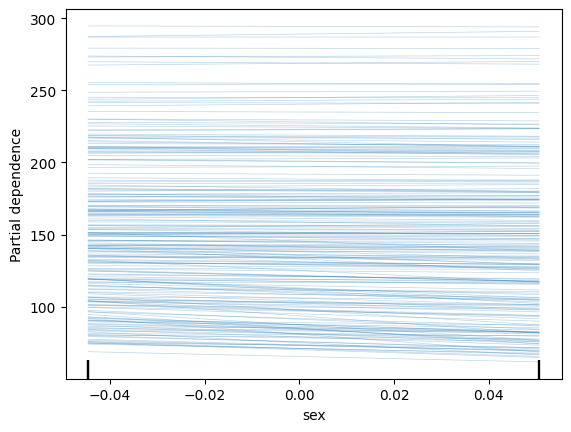

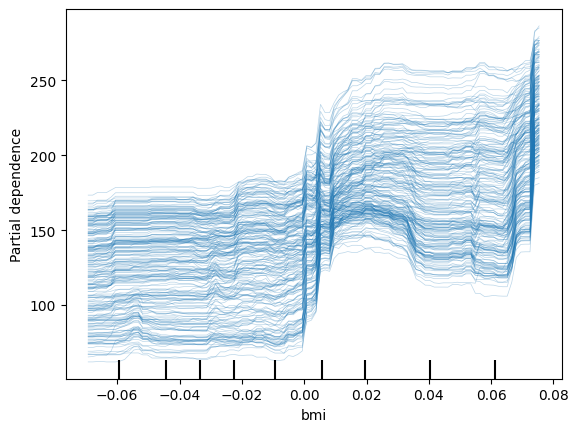

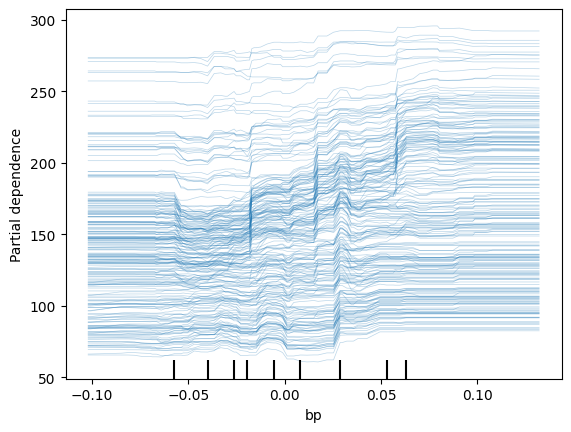

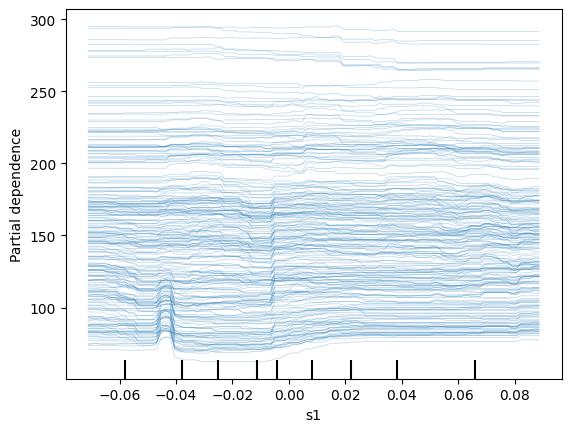

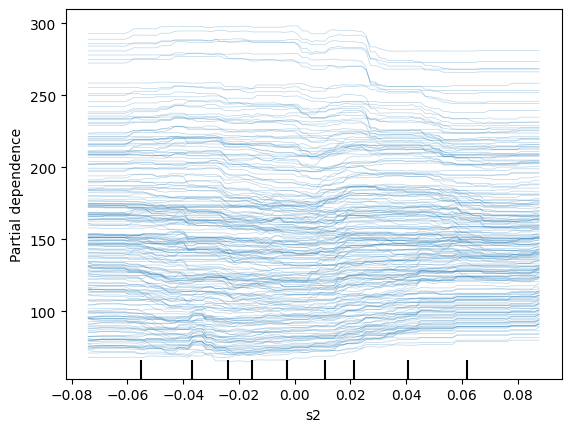

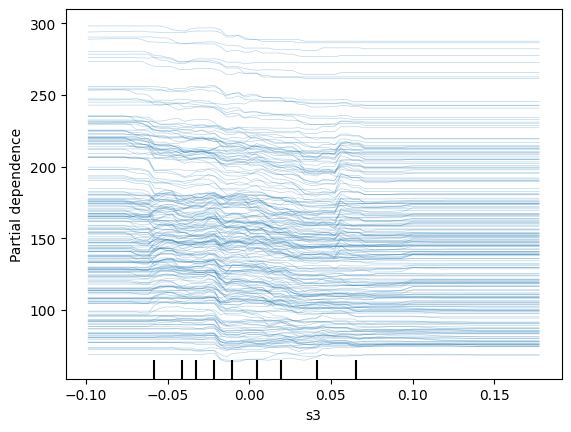

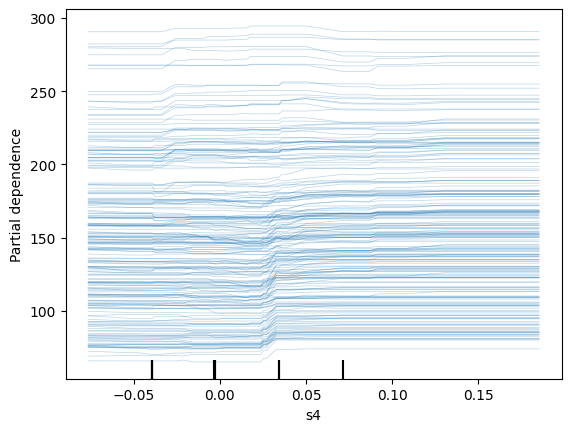

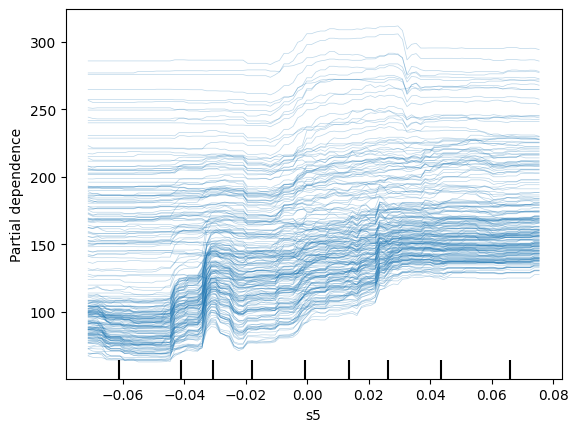

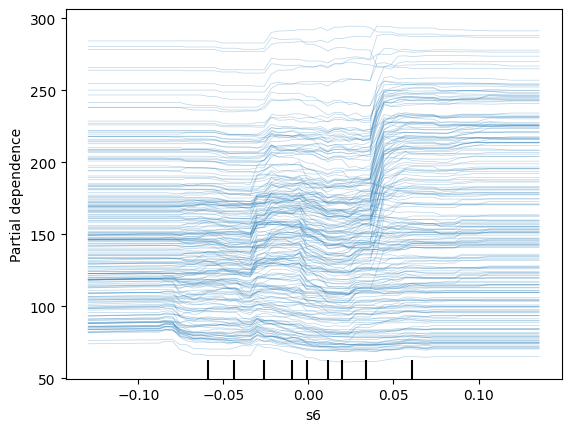

In [17]:
for feature in X.columns:
  PartialDependenceDisplay.from_estimator(model, X_test, [feature], kind='individual') # ICE Plot

Interestingly enough the ICE plot shows that the bmi feature does appear to have a jump up and back down before a final increase. Actually several of the features do appear to contain seemingly odd jumps up or down like the s6 feature around 0. The dataset could just contain these odd jumps and PDP did accuractly mapped the features and was not significantly influenced by the model.